<a href="https://colab.research.google.com/github/Keita062/work/blob/main/(1_9)word_cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install PyPDF2
!pip install pdfplumber
!pip install nltk
!pip install scikit-learn
!pip install wordcloud

In [75]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import PyPDF2
import pdfplumber
import re
from nltk.tokenize import word_tokenize, sent_tokenize
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [107]:
pdf_path = "/content/2501.01433v1.pdf"

In [108]:
# PyPDF2を使用してテキスト抽出
with open(pdf_path, "rb") as pdf_file:
    reader = PyPDF2.PdfReader(pdf_file)
    text_py = ""
    for page in reader.pages:
        text_py += page.extract_text()

In [109]:
# pdfplumber
with pdfplumber.open(pdf_path) as pdf:
    text_pl = ""
    for page in pdf.pages:
        text_pl += page.extract_text()

In [110]:
print("PyPDF2のテキスト：")
print(text_py[:20])
print("\npdfplumberのテキスト：")
print(text_pl[:20])

PyPDF2のテキスト：
arXiv:2501.01433v1  

pdfplumberのテキスト：
4202
ceD
81
]IA.sc[



In [111]:
cleaned_text_py = re.sub(r"\s+", " ", text_py)
cleaned_text_py = re.sub(r"[^a-zA-Z0-9ぁ-んァ-ン一-龥]", " ",text_py)
cleaned_text_pl = re.sub(r"\s+", " ", text_pl)
cleaned_text_pl = re.sub(r"[^a-zA-Z0-9ぁ-んァ-ン一-龥]", " ",text_pl)
cleaned_text_py = " ".join(text_py.split())
cleaned_text_py = " ".join(text_py.split())

In [112]:
print(cleaned_text_py)
print(cleaned_text_pl)

arXiv:2501.01433v1 [cs.AI] 18 Dec 2024MATHEMATICAL DEFINITION AND SYSTEMATIZATION OF PUZZLE RULES A P REPRINT Itsuki Maeda Department of Micro Engineering, Kyoto University Kyoto city, Kyoto 615-8540 JAPAN maeda.itsuki.b27@kyoto-u.jpYasuhiro Inoue Department of Micro Engineering, Kyoto University Kyoto city, Kyoto 615-8540 JAPAN inoue.yasuhiro.4n@kyoto-u.ac.jp January 6, 2025 ABSTRACT While logic puzzles have engaged individuals through probl em-solving and critical thinking, the creation of new puzzle rules has largely relied on ad-hoc pro cesses. Pencil puzzles, such as Slith- erlink and Sudoku, represent a prominent subset of these gam es, celebrated for their intellectual challenges rooted in combinatorial logic and spatial reaso ning. Despite extensive research into solv- ing techniques and automated problem generation, a uniﬁed f ramework for systematic and scalable rule design has been lacking. Here, we introduce a mathemati cal framework for deﬁning and system- atizing pencil p

In [113]:
print(repr(cleaned_text_pl))  # テキストの詳細情報を表示
print("Length of text:", len(cleaned_text_pl))  # テキストの長さを確認

'4202 ceD 81  IA sc  1v33410 1052 viXra MATHEMATICAL DEFINITION AND SYSTEMATIZATION OF PUZZLE RULES A PREPRINT ItsukiMaeda YasuhiroInoue DepartmentofMicroEngineering  DepartmentofMicroEngineering  KyotoUniversity KyotoUniversity Kyotocity Kyoto615 8540JAPAN Kyotocity Kyoto615 8540JAPAN maeda itsuki b27 kyoto u jp inoue yasuhiro 4n kyoto u ac jp January6 2025 ABSTRACT While logic puzzles have engaged individuals through problem solving and critical thinking  the creationof new puzzle ruleshas largelyrelied on ad hocprocesses  Pencilpuzzles  such as Slith  erlink and Sudoku  represent a prominent subset of these games  celebrated for their intellectual challengesrootedincombinatoriallogicandspatialreasoning Despiteextensiveresearchintosolv  ingtechniquesandautomatedproblemgeneration aunifiedframeworkforsystematicandscalable ruledesignhasbeenlacking Here weintroduceamathematicalframeworkfordefiningandsystem  atizingpencilpuzzlerules  Thisframeworkformalizesgridelements theirpositionalrela

In [114]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [115]:
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [116]:
# stopwardを設ける。
nltk.download('stopwords')

def remove_stopwards(text):
    stop_words = str (stopwords.words("english"))
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

# ストップワードの削除
cleaned_text_py = remove_stopwards(cleaned_text_py)
cleaned_text_pl = remove_stopwards(cleaned_text_pl)

print(cleaned_text_py)
print(cleaned_text_pl)

arXiv:2501.01433v1 cs.AI 18 Dec 2024MATHEMATICAL DEFINITION SYSTEMATIZATION PUZZLE RULES REPRINT Itsuki Maeda Department Micro Engineering Kyoto University Kyoto city Kyoto 615-8540 JAPAN maeda.itsuki.b27 @ kyoto-u.jpYasuhiro Inoue Department Micro Engineering Kyoto University Kyoto city Kyoto 615-8540 JAPAN inoue.yasuhiro.4n @ kyoto-u.ac.jp January 6 2025 ABSTRACT logic puzzles engaged individuals probl em-solving critical thinking creation new puzzle rules largely relied ad-hoc pro cesses . Pencil puzzles Slith- erlink Sudoku represent prominent subset gam celebrated intellectual challenges rooted combinatorial logic spatial reaso ning . Despite extensive research solv- techniques automated problem generation uniﬁed ramework systematic scalable rule design lacking . introduce mathemati cal framework deﬁning system- atizing pencil puzzle rules . framework formalizes gri elements positional relationships iterative composition operations allowing inc remental construction structures for

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [117]:
try:
    # 単語トークン化
    words_pl = word_tokenize(cleaned_text_pl)
    print("Word Tokenization Successful")
    print(words_pl)
except Exception as e:
    print("Word Tokenization Error:", e)

try:
    # 文トークン化
    sentences_pl = sent_tokenize(cleaned_text_pl)
    print("Sentence Tokenization Successful")
    print(sentences_pl)
except Exception as e:
    print("Sentence Tokenization Error:", e)


Word Tokenization Successful
['4202', 'ceD', '81', 'IA', 'sc', '1v33410', '1052', 'viXra', 'MATHEMATICAL', 'DEFINITION', 'SYSTEMATIZATION', 'PUZZLE', 'RULES', 'PREPRINT', 'ItsukiMaeda', 'YasuhiroInoue', 'DepartmentofMicroEngineering', 'DepartmentofMicroEngineering', 'KyotoUniversity', 'KyotoUniversity', 'Kyotocity', 'Kyoto615', '8540JAPAN', 'Kyotocity', 'Kyoto615', '8540JAPAN', 'maeda', 'itsuki', 'b27', 'kyoto', 'jp', 'inoue', 'yasuhiro', '4n', 'kyoto', 'jp', 'January6', '2025', 'ABSTRACT', 'logic', 'puzzles', 'engaged', 'individuals', 'problem', 'solving', 'critical', 'thinking', 'creationof', 'new', 'puzzle', 'ruleshas', 'largelyrelied', 'hocprocesses', 'Pencilpuzzles', 'Slith', 'erlink', 'Sudoku', 'represent', 'prominent', 'subset', 'games', 'celebrated', 'intellectual', 'challengesrootedincombinatoriallogicandspatialreasoning', 'Despiteextensiveresearchintosolv', 'ingtechniquesandautomatedproblemgeneration', 'aunifiedframeworkforsystematicandscalable', 'ruledesignhasbeenlacking', '

In [118]:
try:
    # 単語トークン化
    words_py = word_tokenize(cleaned_text_py)
    print("Word Tokenization Successful")
    print(words_py)
except Exception as e:
    print("Word Tokenization Error:", e)

try:
    # 文トークン化
    sentences_py = sent_tokenize(cleaned_text_py)
    print("Sentence Tokenization Successful")
    print(sentences_py)
except Exception as e:
    print("Sentence Tokenization Error:", e)


Word Tokenization Successful
['arXiv:2501.01433v1', 'cs.AI', '18', 'Dec', '2024MATHEMATICAL', 'DEFINITION', 'SYSTEMATIZATION', 'PUZZLE', 'RULES', 'REPRINT', 'Itsuki', 'Maeda', 'Department', 'Micro', 'Engineering', 'Kyoto', 'University', 'Kyoto', 'city', 'Kyoto', '615-8540', 'JAPAN', 'maeda.itsuki.b27', '@', 'kyoto-u.jpYasuhiro', 'Inoue', 'Department', 'Micro', 'Engineering', 'Kyoto', 'University', 'Kyoto', 'city', 'Kyoto', '615-8540', 'JAPAN', 'inoue.yasuhiro.4n', '@', 'kyoto-u.ac.jp', 'January', '6', '2025', 'ABSTRACT', 'logic', 'puzzles', 'engaged', 'individuals', 'probl', 'em-solving', 'critical', 'thinking', 'creation', 'new', 'puzzle', 'rules', 'largely', 'relied', 'ad-hoc', 'pro', 'cesses', '.', 'Pencil', 'puzzles', 'Slith-', 'erlink', 'Sudoku', 'represent', 'prominent', 'subset', 'gam', 'celebrated', 'intellectual', 'challenges', 'rooted', 'combinatorial', 'logic', 'spatial', 'reaso', 'ning', '.', 'Despite', 'extensive', 'research', 'solv-', 'techniques', 'automated', 'problem',

In [119]:
# 単語の頻度計算
word_freq_py = Counter(words_py)
word_freq_pl = Counter(words_pl)

In [120]:
# 上位10単語を表示
print(list(word_freq_py.most_common(30)))
print(list(word_freq_pl.most_common(30)))

[('(', 391), (')', 391), ('.', 294), ('}', 168), ('{', 160), ('null', 106), ('sequence', 85), ('puzzle', 68), ('board', 65), ('→', 63), ('deﬁne', 49), ('structure', 47), ('solution', 43), ('rules', 41), ('1', 37), ('``', 36), ('...', 35), ('rule', 32), ('grid', 30), ('/parenrightbig', 30), ('Deﬁnition', 29), ('1,1', 29), ('constraints', 28), ('structures', 27), (':', 26), ('point', 25), ('sequences', 25), ('elements', 22), ('existing', 22), ('domain', 22)]
[('1', 235), ('cid', 129), ('null', 112), ('2', 94), ('0', 66), ('3', 53), ('X', 38), ('solution', 32), ('x', 27), ('Q', 20), ('puzzle', 17), ('4', 17), ('rules', 16), ('APREPRINT', 14), ('6', 14), ('undecided', 14), ('fill', 14), ('Definition2', 13), ('X1', 12), ('puzzles', 11), ('board', 11), ('k', 11), ('However', 10), ('2024', 10), ('structure', 10), ('9', 10), ('Bcon', 10), ('domainandhiddenare', 10), ('constraintsare', 10), ('16', 9)]


In [121]:
# TF-IDFで単語の重要度を計算
vectorizer_TF_IDF = TfidfVectorizer(max_features=10)  # 上位10単語を抽出
tfidf_matrix_py = vectorizer_TF_IDF.fit_transform([cleaned_text_py])
tfidf_matrix_pl = vectorizer_TF_IDF.fit_transform([cleaned_text_pl])

In [122]:
# 単語とスコアの対応を表示
print("pyの単語とスコア")
Words_and_scores_for_py =  dict(zip(vectorizer.get_feature_names_out(), tfidf_matrix_py.toarray()[0]))
print(Words_and_scores_for_py)

print("plの単語とスコア")
Words_and_scores_for_pl =  dict(zip(vectorizer.get_feature_names_out(), tfidf_matrix_pl.toarray()[0]))
print(Words_and_scores_for_pl)

pyの単語とスコア
{'apreprint': 0.3197873781391403, 'cid': 0.22069833139180106, 'definition2': 0.5089573764749699, 'fill': 0.22069833139180106, 'null': 0.22069833139180106, 'puzzle': 0.39635618698935704, 'rules': 0.22520237897122558, 'solution': 0.41437237730705506, 'undecided': 0.2612347596066217, 'x1': 0.21169023623295205}
plの単語とスコア
{'apreprint': 0.07815620773205298, 'cid': 0.7201536283882024, 'definition2': 0.08932138026520339, 'fill': 0.07815620773205298, 'null': 0.6252496618564238, 'puzzle': 0.10048655279835382, 'rules': 0.09490396653177861, 'solution': 0.18980793306355723, 'undecided': 0.07815620773205298, 'x1': 0.09490396653177861}


In [123]:
# LDAでトピック抽出(cleaned_py)
vectorizer_LDA = TfidfVectorizer(max_features=500)
X_py = vectorizer_LDA.fit_transform([cleaned_text_py])
lda_py = LatentDirichletAllocation(n_components=5, random_state=42)  # トピック数を5に設定
lda_py.fit(X_py)

print("PYのLDAのトピック")

# 各トピックの上位単語を表示(cleaned_py)
for idx_py, topic in enumerate(lda_py.components_):
    print(f"トピック {idx_py+1}: ", [vectorizer_LDA.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

PYのLDAのトピック
トピック 1:  ['edge', 'undecided', 'ah', 'possessed', 'hp', 'slitherlink', 'cell', 'certain', 'study', 'vp']
トピック 2:  ['edge', 'undecided', 'ah', 'possessed', 'hp', 'slitherlink', 'cell', 'certain', 'study', 'vp']
トピック 3:  ['structure', 'parenrightbig', 'deﬁne', 'parenleftbig', 'rule', 'solution', 'board', 'puzzle', 'sequence', 'null']
トピック 4:  ['edge', 'undecided', 'ah', 'possessed', 'hp', 'slitherlink', 'cell', 'certain', 'study', 'vp']
トピック 5:  ['edge', 'undecided', 'ah', 'possessed', 'hp', 'slitherlink', 'cell', 'certain', 'study', 'vp']


In [124]:
# LDAでトピック抽出(cleaned_py)
X_pl = vectorizer_LDA.fit_transform([cleaned_text_pl])
lda_pl = LatentDirichletAllocation(n_components=5, random_state=42)  # トピック数を5に設定
lda_pl.fit(X_pl)

print("PlのLDAのトピック")

# 各トピックの上位単語を表示(cleaned_py)
for idx_pl, topic in enumerate(lda_pl.components_):
    print(f"トピック {idx_pl+1}: ", [vectorizer_LDA.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

PlのLDAのトピック
トピック 1:  ['domainandhiddenare', 'bcon', 'constraintsare', '2024', 'undecided', 'fill', 'apreprint', 'however', 'board', 'puzzles']
トピック 2:  ['domainandhiddenare', 'bcon', 'constraintsare', '2024', 'undecided', 'fill', 'apreprint', 'however', 'board', 'puzzles']
トピック 3:  ['domainandhiddenare', 'bcon', 'constraintsare', '2024', 'undecided', 'fill', 'apreprint', 'however', 'board', 'puzzles']
トピック 4:  ['apreprint', 'undecided', 'fill', 'definition2', 'x1', 'rules', 'puzzle', 'solution', 'null', 'cid']
トピック 5:  ['domainandhiddenare', 'bcon', 'constraintsare', '2024', 'undecided', 'fill', 'apreprint', 'however', 'board', 'puzzles']


In [125]:
top_words_py = word_freq_py.most_common(10)
word,counts = zip(*top_words_py)

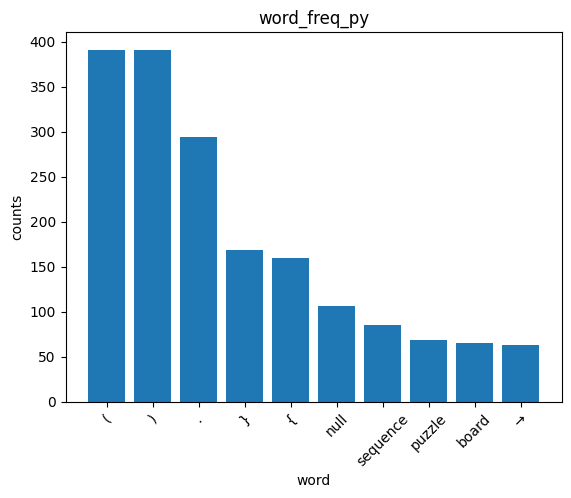

In [126]:
plt.bar(word,counts)
plt.xlabel("word")
plt.ylabel("counts")
plt.title("word_freq_py")
plt.xticks(rotation = 45)
plt.show()

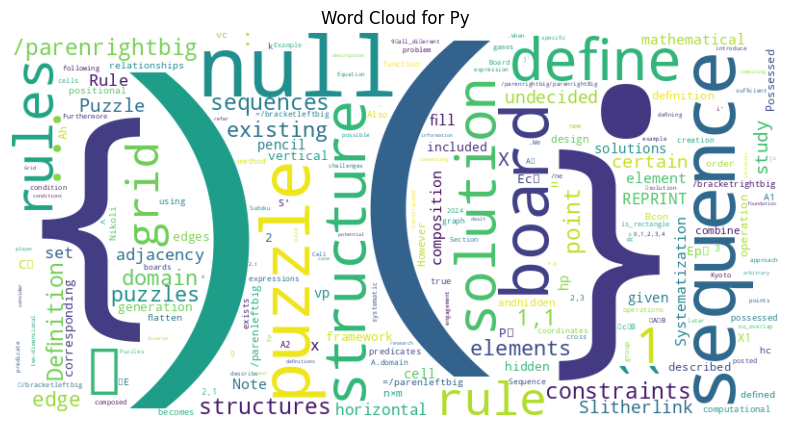

In [127]:
wordcloud_py = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq_py)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_py, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Py")
plt.show()

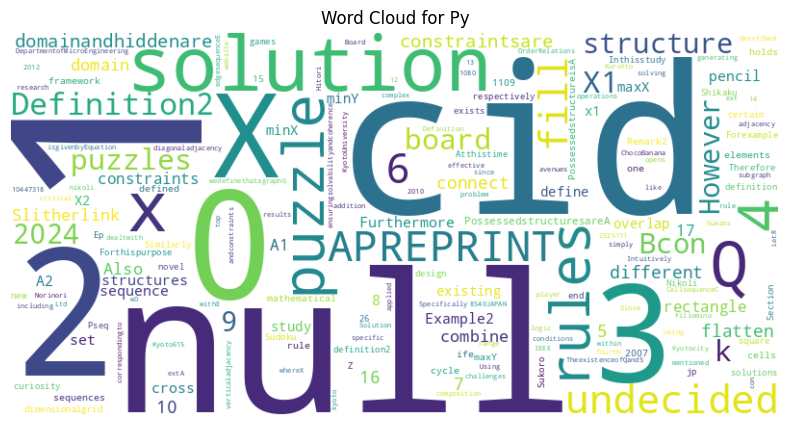

In [128]:
wordcloud_pl = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq_pl)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pl, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Py")
plt.show()

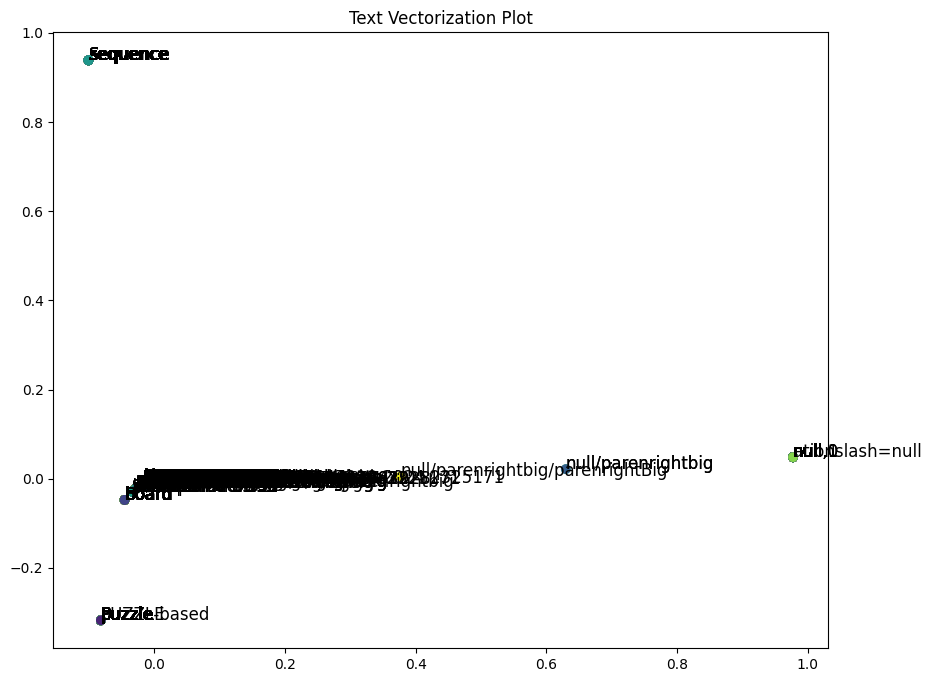

In [134]:
# ここからテキストから言葉のベクトル化する
vectorizer_TF_IDF_2 = TfidfVectorizer(max_features=100)  # 最大100次元の特徴量を使用
X2 = vectorizer.fit_transform(words_py).toarray()

# 次元のさくじょ
pca = PCA(n_components=2)  # 2次元に削減
X_reduced = pca.fit_transform(X2)

#plot
plt.figure(figsize=(10, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=np.random.rand(len(X_reduced)), cmap='viridis')
for i, text in enumerate(words_py):
    plt.annotate(text, (X_reduced[i, 0], X_reduced[i, 1]), fontsize=12)
plt.title("Text Vectorization Plot")
plt.show()